# Исследование объявлений о продаже квартир

## Импорт библиотек

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Изучение даннных из файла

In [2]:
real_estate_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
real_estate_data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

>1. Есть пропущенные значения во многих столбцах. Для решения задачи из столбцов, с пропущенными значениями, нам интересны только: ceiling_height, floors_total, living_area, kitchen_area, balcony, locality_name, cityCenters_nearest, days_exposition. Посмотрим на количество пропущенных значений в этих столбцах
>2. Разберемся с пропусками в нужных столбцах, заменим их, остальные можно не трогать для экономии времени
>3. Поищем дубликаты
>4. Стоит присвоить целочисленные значения столбцам: floors_total, balcony, days_exposition
>5. Приведем стоимость в рублях к млн. рублей
>6. Приведем удаленность от центра в метрах к километрам
>7. Присвоим временной формат данных столбцу first_day_exposition

## Предобработка данных

###  Изучение количества пропусков

In [4]:
real_estate_data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

>
>**ceiling_height** - почти 39% значений пропущено. С этим, конечно, хотелось бы что-то сделать. Но во-первых, этот параметр нам нужно анализировать только для центра Санкт-Петербурга и скорее всего после всех манипуляций, процент отсутствующих данных значительно сократиться и никак не повлияет на выводы, а во вторых, высоту потолков мы все равно никак заменить не сможем  
>
>**floors_total** - 0,36% значений пропущено. Можем оставить пропуски, на общие выводы их отсутствие никак не повлияет  
>
>**living_area** - 8% значений пропущено. Можем оставить этот столбец, как есть. В любом случае жилую площадь никак не рассчитать  
>
>**kitchen_area** - 9,6% значений пропущено. Оставляем пустые данные. Процент пропусков небольшой  
>
>**balcony** - почти 49% значений пропущено. Здесь можем заменить пропущенные значения на 0, поскольку, вероятнее всего, отсутствие данных означает отсутствие балкона в принципе  
>
>**locality_name** - всего 0,2% данных пропущено. Отсутствие этих данных никак не повлияет на выводы  
>
>**cityCenters_nearest** - 23% данных отсутствуют. Для решения задачи нас интересует только удаленность от центра в Санкт-Петербурге, поскольку точной локации в СПб не указано, посмотрим сколько пропущенных значений именно в СПб и повлияют ли они на принятие решения   > 
>**days_exposition** - 13% данных отсутствует. Для решения задачи, на мой взгляд, можно оставить как есть

### Замена пропущенных данных в balcony

In [5]:
real_estate_data['balcony'] = real_estate_data['balcony'].fillna(0)
#real_estate_data.info() #проверяем

### Проверка количества пропущенных данных в cityCenters_nearest по СПб

In [6]:
real_estate_data[(real_estate_data['cityCenters_nearest'].isnull() == True) & (real_estate_data['locality_name'] == 'Санкт-Петербург')]['locality_name'].value_counts()


Санкт-Петербург    61
Name: locality_name, dtype: int64

> Даных пропущено немного

### Поиcк дубликатов

In [7]:
real_estate_data.duplicated().sum()

0

> Дубликатов не найдено

### Изменение типов данных

In [8]:
#Присвоим целочисленное значение столбцу balcony
real_estate_data['balcony'] = real_estate_data['balcony'].astype(int) 
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [9]:
#Присвоим временной формат данных столбцу first_day_exposition
real_estate_data['first_day_exposition'] = pd.to_datetime(real_estate_data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#real_estate_data.info()

### Корректировка данных

**Заменим стоимость в рубл. на стоимость в млн. рубл**

In [10]:
real_estate_data['last_price'] = real_estate_data['last_price'] / 1000000

**Заменим метры в удаленности от центра в километры**

In [11]:
real_estate_data['cityCenters_nearest'] = real_estate_data['cityCenters_nearest'] / 1000

In [12]:
#проверяем что получилось
real_estate_data['cityCenters_nearest'].head(10)

0    16.028
1    18.603
2    13.933
3     6.800
4     8.098
5       NaN
6    19.143
7    11.634
8       NaN
9    15.008
Name: cityCenters_nearest, dtype: float64

## Расчёты и добавление результатов в таблицу

Считаем и добавляем цену квадратного метра

In [13]:
real_estate_data['m2_cost'] = real_estate_data['last_price'] / real_estate_data['total_area']*1000000
#real_estate_data.head(10)

Добавляем день недели, месяц и год публикации объявления

In [14]:
real_estate_data['weekday'] = real_estate_data['first_day_exposition'].dt.weekday
real_estate_data['month'] = real_estate_data['first_day_exposition'].dt.month
real_estate_data['year'] = real_estate_data['first_day_exposition'].dt.year
#real_estate_data.head(10)

Добавляем тип этажа квартиры

In [15]:
def floor_type(row):
    floor = row['floor']
    total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == total:
        return 'последний'
    else:
        return 'другой'
real_estate_data['floor_type'] = real_estate_data.apply(floor_type, axis=1)
#print(real_estate_data['floor_type'].unique())

Добавляем соотношение жилой и общей площади

In [16]:
real_estate_data['living_total_ratio'] = real_estate_data['living_area'] / real_estate_data['total_area']
#real_estate_data.head(10)

Добавляем соотношение площади кухни к общей площади

In [17]:
real_estate_data['kitchen_total_ratio'] = real_estate_data['kitchen_area'] / real_estate_data['total_area']
#real_estate_data.head(10)
                                                                                              

## Исследовательский анализ данных

### Изучение параметров: площадь, цена, число комнат, высота потолков. Построение гистограммы для каждого параметра.

#### Площадь

In [18]:
real_estate_data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

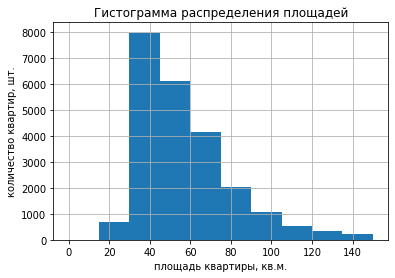

In [19]:
real_estate_data['total_area'].hist(bins=10, range=(0, 150))
plt.title('Гистограмма распределения площадей')
plt.xlabel('площадь квартиры, кв.м.')
plt.ylabel('количество квартир, шт.')
plt.show()

> Ограничили гистограмму наиболее стандартной площадью квартир. Все, что больше 150 кв.м., скорее всего будет относится к 4х комнатным квартирам или квартирам "премиального" класса, их частота будет встречаться меньше. Как видно на графике, пик наблюдается в районе 30-45 квадртаных метров. Это похоже на реальность, т.к. это однокомнатные квартиры. Второй пик на стандартных двухкомнатных и далее. До 30 кв. метров наблюдается спад, что тоже похоже на правду. Распределение нормальное.

#### Цена

In [20]:
real_estate_data['last_price'].describe()

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

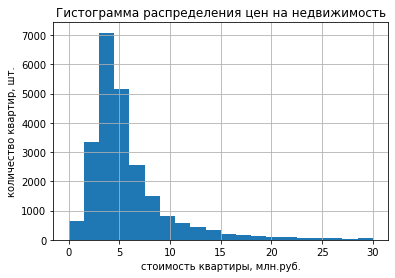

In [21]:
real_estate_data['last_price'].hist(bins=20, range=(0, 30))
plt.title('Гистограмма распределения цен на недвижимость')
plt.xlabel('стоимость квартиры, млн.руб.')
plt.ylabel('количество квартир, шт.')
plt.show()

> Распределение выглядит как нормальное. Ограничили стоимость квартиры 30 млн, исходя из предыдущих данных и максимального метража в 150 квадратов. Как видно на графике - пик наблюдается примерно в отметке 3-4,5 млн. Второй пик - 4,5 - 6 млн, что также логично соответствует разбросу и в площадях квартир. Длинный хвост тянется уже после 15 млн.  Интересно также, что сразу видно, что мы работаем с устаревшими данными. Если бы мы работали с данными, актуальными на сегодняшнюю дату, разброс цен был бы абсолютно другим 

#### Число комнат

In [22]:
real_estate_data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

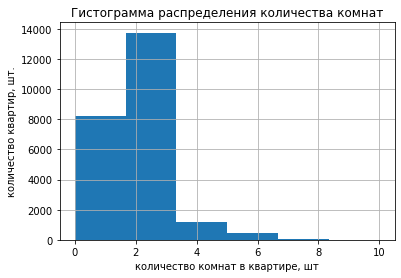

In [23]:
real_estate_data['rooms'].hist(bins=6, range=(0, 10))
plt.title('Гистограмма распределения количества комнат')
plt.xlabel('количество комнат в квартире, шт')
plt.ylabel('количество квартир, шт.')
plt.show()

> Все довольно логично, если сравнивать с предыдущими графиками. Популярны 1-2 комнатные квартиры, второй пик - 3х комнатные и далее уже идут квартиры с бОльшим количеством комнат

#### Высота потолков

In [24]:
real_estate_data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

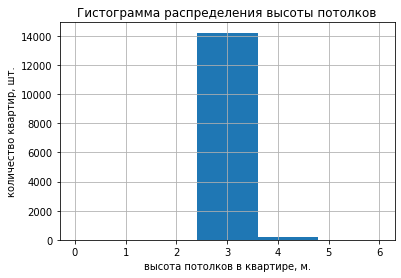

In [25]:
real_estate_data['ceiling_height'].hist(bins=5, range=(0, 6))
plt.title('Гистограмма распределения высоты потолков')
plt.xlabel('высота потолков в квартире, м.')
plt.ylabel('количество квартир, шт.')
plt.show()

>Стандартная ситуация - потолки 2,3-3,7 метра преобладают. После 3,7 наблюдается спад. Сейчас в новостройках уже другое соотношение высоты потолков, и высота 4-5 метров встречается гораздо чаще. 100 метровые потолки больше похоже на ошибку. Возможно, имелось ввиду 10 метров, что вполне возможно для элитного жилья, в котором есть два уровня. Это редкость, но может встречаться

### Изучение времени продажи квартир

In [26]:
real_estate_data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

>Среднее время продажи квартиры - 180 дней, т.е. 6 месяцев. Медиана составляет 95 дней, то есть порядка 3х месяцев. Стандартное отклонение 219, предполагаю, что разброс большой, поскольку в датафрейме у нас присутствуют очень дорогие элитные квартиры, время продажи которых точно составляет более чем полгода. Построим гистограмму, поделив ее на месяцы, так будет удобнее

<AxesSubplot:>

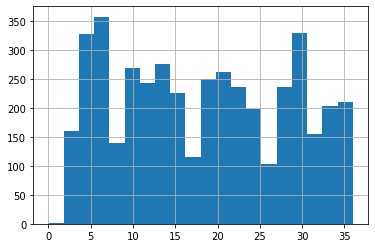

In [27]:
real_estate_data['days_exposition'].hist(bins=20, range=(0, 36))

>Пики наблюдаются на отрезке от 4 до 7 месяцев. Но наблюдаются и другие пики. Например, на отрезке от 11 до 14 месяцев, от 17 до 22 месяцев. Скорее всего это обсуловлено тем, что у нас есть квартиры, которые выбиваются из средней стоимости. Например, элитные квартиры, квартиры с очень большим количеством комнат (16), квартиры высокого класса, где, например, 1 комната, но стоимость значительно выше средней однушки и так далее. Соответствено и продаются они дольше. Отсюда же и большое стандартное отклонение. Хорошо бы не учитывать такие редкие значения.  
>
>Быстрой продажой можно считать проажу до 3,5 месяцев. А вот насчет аномально долгой, лучще построить еще один график

<AxesSubplot:>

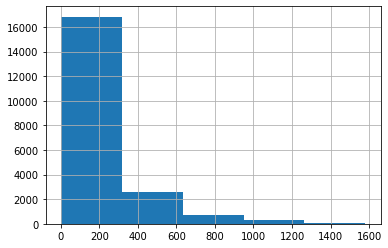

In [28]:
real_estate_data['days_exposition'].hist(bins=5)

>К **аномально долгой продаже** можно отнести все, что больше 3,5 лет.   
>К **очень долгой**, от 2,5 до 3,5 лет.   
>К **долгой** - от года до 2,5  
>
>В среднем все квартиры продаются за 1 год, что вполне соответствует норме

### Редкие и выбивающиеся значения

Разберемся, что убирать.   

1. **Площадь.** Исходя из гистограммы, думаю, что стоит убрать слишком маленькую площадь квартир (до 30 кв м) и большую после 105 кв.м
2. **Цена.** Ограничим данные стоимостью от 2 до 15 млн.
3. **Число комнат.** Ограничим от 1 комнаты до 6 комнат
5. **Высота потолков.** От 2,3 метров до 3,7 метров
6. **Время продажи.** Возьмем отрезок от 60 до 700 дней

In [29]:
real_estate_final = real_estate_data.query('30 <= total_area <= 105 \
    and 1 < last_price <= 15 \
    and 1 <= rooms < 6 \
    and (2.3 <= ceiling_height <= 3.7 or ceiling_height.isna()) \
    and (60 < days_exposition < 700 or days_exposition.isna())')

real_estate_final.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,m2_cost,weekday,month,year,floor_type,living_total_ratio,kitchen_total_ratio
1,7,3.350,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,...,0.0,NaN,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5.196,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,...,2.0,574.0,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214
4,2,10.000,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,1.0,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000
6,6,3.700,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,...,0.0,NaN,155.0,99195.710456,3,11,2017,другой,0.284182,0.386059
7,5,7.915,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,...,0.0,NaN,NaN,110544.692737,3,4,2019,другой,NaN,0.263966
8,20,2.900,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,...,NaN,NaN,189.0,87454.764777,2,5,2018,другой,0.465320,0.265682
9,18,5.400,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,0.0,NaN,289.0,88524.590164,6,2,2017,другой,0.714754,0.106557
10,5,5.050,39.60,2017-11-16,1,2.67,12.0,20.30,3,NaN,...,2.0,553.0,137.0,127525.252525,3,11,2017,другой,0.512626,0.214646
12,10,3.890,54.00,2016-06-30,2,NaN,5.0,30.00,5,NaN,...,NaN,NaN,90.0,72037.037037,3,6,2016,последний,0.555556,0.166667
13,20,3.550,42.80,2017-07-01,2,2.56,5.0,27.00,5,NaN,...,3.0,298.0,366.0,82943.925234,5,7,2017,последний,0.630841,0.121495


In [30]:
print('Осталось 18632 строк из прошлых', len(real_estate_data))

Осталось 18632 строк из прошлых 23699


>Избавились от 21% выбросов

### Зависимости

#### Зависимость цены от площади, числа комнат, удаленности от центра

In [31]:
print('Коэффициент корреляции между ценой и площадью:', real_estate_final['last_price'].corr(real_estate_final['total_area']))
print('Коэффициент корреляции между ценой и количеством комнат:', real_estate_final['last_price'].corr(real_estate_final['rooms']))
print('Коэффициент корреляции между ценой и удаленностью от центра:', real_estate_final['last_price'].corr(real_estate_final['cityCenters_nearest']))





Коэффициент корреляции между ценой и площадью: 0.7057485313774354
Коэффициент корреляции между ценой и количеством комнат: 0.40157843129331533
Коэффициент корреляции между ценой и удаленностью от центра: -0.35692038330309533


>Высокий показатель между площадью квартиры и ее ценой. Логично, что чем больше площадь квартиры, тем выше и ее цена.  
>
>Связь между стоимостью квартиры и количеством комнат есть, однако не сильная. Стоит предположить, что есть ситуации, когда цена растет при увеличении количества комнат и наоборот, но так бывает далеко не всегда. Легко могут быть ситуации, когда большая площадь не говорит о наличии большего количества комнат.  
>
>С увеличением удаленности квартиры от центра *иногда* ее стоимость уменьшается. Но также есть элитные нецентральные районы, малоэтажные постройки и так далее, в которых стоимость квартир гораздо выше центральных. Исходя из полученного коэффициента я бы не делала выводов по уменьшению стоимости в связи с удаленностью от центра.

#### Зависимость цены от этажа, на котором расположена квартира

In [32]:
real_estate_final.pivot_table(index='floor_type', values='last_price').reset_index()


,floor_type,last_price
0,другой,5.453187
1,первый,4.400903
2,последний,4.848205


>Квартиры на **первом** этаже дешевле, чем квартиры на других этажах  
>Квартиры на **последнем** этаже дороже всего.

#### Зависимость цены от даты размещения

In [33]:
#зависимость от дня размещения
real_estate_final.pivot_table(index='weekday', values='last_price').sort_values(by = 'last_price').reset_index()

,weekday,last_price
0,5,5.114476
1,4,5.151842
2,0,5.202427
3,3,5.212100
4,6,5.214142
5,2,5.282953
6,1,5.315020


>Сильной зависимости цены от дня размещения объявления я не наблюдаю. Думаю, что нет особенного влияния на конечную стоимость квартиры то, в какой день было размещено объявление. Самая высокая конечная стоимость у объявлений, размещенных в четверг и субботу. Низкие в воскресенье, понедельник, пятницу. Думаю, если связь и есть, то она зависит от алгоритмов площадок на которых было размещено каждое объявление. 

In [34]:
#зависимость от месяца размещения
real_estate_final.pivot_table(index='month', values='last_price').sort_values(by = 'last_price').reset_index()


,month,last_price
0,6,5.038423
1,5,5.083318
2,7,5.203325
3,3,5.203724
4,8,5.204113
5,10,5.230783
6,2,5.241058
7,4,5.245473
8,11,5.274425
9,9,5.281820


>В **мае и августе** размещаются самые **дешевые** квартиры.  
>В **декабре и январе** - самые **дорогие** квартиры.   
>Есть логика в сезонности


In [35]:
#зависимость от года размещения
real_estate_final.pivot_table(index='year', values='last_price').sort_values(by = 'last_price').reset_index()

,year,last_price
0,2016,4.980409
1,2017,5.082396
2,2015,5.295948
3,2018,5.326137
4,2019,5.552952
5,2014,6.870131


>Средняя стоимость за квартиры, объявления которых были размещены в 2014 году, самая высокая. В 2015 резкий спад, в 2016 легкий спад и далее идет ровное увеличение в цене вплоть до 2019 года. Возможно, это связано с кризисом 2014 года

#### Зависимость цены от населенного пункта

In [36]:
real_estate_10 = real_estate_final.groupby('locality_name').agg({'m2_cost': ['count', 'mean'], 'last_price': ['mean']})
real_estate_10.columns = ['Количество объявлений', 'Средняя цена за м2', 'Средняя цена жилья']
real_estate_10.sort_values(by = 'Количество объявлений', ascending = False).head(10).sort_values(by = 'Средняя цена жилья', ascending = False)



,Количество объявлений,Средняя цена за м2,Средняя цена жилья
locality_name,,,
Санкт-Петербург,8481,108119.963765,6.135778
Пушкин,237,101011.670919,5.587169
посёлок Парголово,185,90450.134204,4.612790
деревня Кудрово,135,91052.085555,4.289835
посёлок Шушары,253,77771.077149,4.140765
Колпино,187,75774.538459,4.039509
Всеволожск,263,67396.894272,3.862635
посёлок Мурино,255,83516.707369,3.829534
Гатчина,186,68623.961988,3.492873


> Самая высокая стоимость жилья в Санкт-Петербурге. Дальше идут Пушкин и поселок Парголово. Самые недорогие квартиры расположены во Всеволожске, Гатчине и Выборге

#### Зависимость цены от удаленности от центра

In [37]:
#Делаем срез, в котором останется только Санкт-Петербург
real_estate_spb = real_estate_final.query('locality_name == "Санкт-Петербург"')
real_estate_spb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8481 entries, 2 to 23697
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          8481 non-null   int64         
 1   last_price            8481 non-null   float64       
 2   total_area            8481 non-null   float64       
 3   first_day_exposition  8481 non-null   datetime64[ns]
 4   rooms                 8481 non-null   int64         
 5   ceiling_height        5601 non-null   float64       
 6   floors_total          8443 non-null   float64       
 7   living_area           8042 non-null   float64       
 8   floor                 8481 non-null   int64         
 9   is_apartment          1071 non-null   object        
 10  studio                8481 non-null   bool          
 11  open_plan             8481 non-null   bool          
 12  kitchen_area          7966 non-null   float64       
 13  balcony          

В столбце с расстоянием до центра остались пустые значения. Их всего 4. Для решения задачи удалим их

In [38]:
real_estate_spb = real_estate_spb.dropna(subset = ['cityCenters_nearest'])
real_estate_spb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8449 entries, 2 to 23697
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          8449 non-null   int64         
 1   last_price            8449 non-null   float64       
 2   total_area            8449 non-null   float64       
 3   first_day_exposition  8449 non-null   datetime64[ns]
 4   rooms                 8449 non-null   int64         
 5   ceiling_height        5583 non-null   float64       
 6   floors_total          8412 non-null   float64       
 7   living_area           8019 non-null   float64       
 8   floor                 8449 non-null   int64         
 9   is_apartment          1069 non-null   object        
 10  studio                8449 non-null   bool          
 11  open_plan             8449 non-null   bool          
 12  kitchen_area          7941 non-null   float64       
 13  balcony          

Создадим столбец с округленным расстоянием до центра в км

In [39]:
real_estate_spb['cityCenters_nearest_km'] = real_estate_spb['cityCenters_nearest'].astype(int)
#real_estate_spb.head(10)

Считаем среднюю цену для каждой удаленности

In [40]:
real_estate_spb_price_distance = real_estate_spb.pivot_table(index='cityCenters_nearest_km', values=['last_price'], aggfunc=['mean'])
real_estate_spb_price_distance.columns = ['price_distance']
#display(real_estate_spb_price_distance)



Построим график зависимости цены от удаленности от центра

<AxesSubplot:xlabel='cityCenters_nearest_km'>

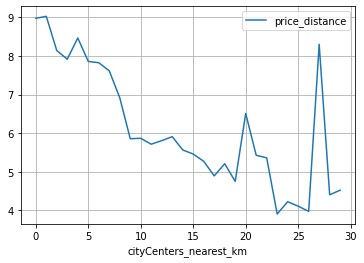

In [41]:
real_estate_spb_price_distance.plot(y=['price_distance'], style='-', grid=True)


>На отрезке 0-5 км - стоимость держится примерно в одном секторе, после 5 км стоимость идет вниз, поэтому будет логично ограничить центр 5 км.

#### Выявление зависимостей у квартир, расположенных в центре Спб

Выделяем сегмент квартир в центре

In [42]:
real_estate_spb_centre = real_estate_spb.query('cityCenters_nearest_km <= 5')
#real_estate_spb_centre.head()

##### Высота потолков в центре. Сравнение с городом

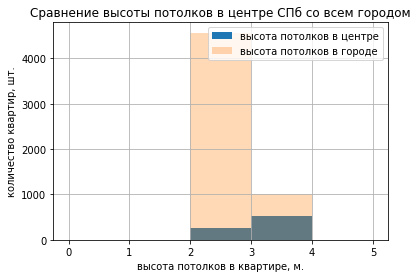

In [43]:
real_estate_spb_centre['ceiling_height'].hist(bins=5, range=(0, 5), label='высота потолков в центре')
real_estate_spb['ceiling_height'].hist(bins=5, range=(0, 5), alpha=0.3, label='высота потолков в городе')
plt.title('Сравнение высоты потолков в центре СПб со всем городом')
plt.xlabel('высота потолков в квартире, м.')
plt.ylabel('количество квартир, шт.')
plt.legend()
plt.show()

>В центре преобладает высота потолков от 3 до 4 метров, когда как, например, по всему СПб преобладающее значение 2-3 метра

##### Площадь квартир в центре. Сравнение с городом

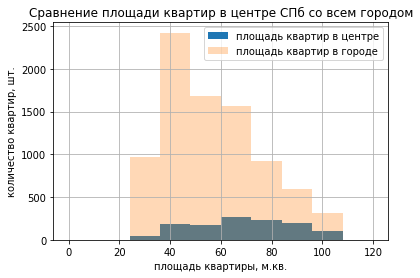

In [44]:
real_estate_spb_centre['total_area'].hist(bins=10, range=(0, 120), label='площадь квартир в центре')
real_estate_spb['total_area'].hist(bins=10, range=(0, 120), alpha=0.3, label='площадь квартир в городе')
plt.title('Сравнение площади квартир в центре СПб со всем городом')
plt.xlabel('площадь квартиры, м.кв.')
plt.ylabel('количество квартир, шт.')
plt.legend()
plt.show()

>В центре преобладает площадь в 60-73 квадратных метров, на втором месте с небольшим отрывом от 73 до 83.  
>По городу показатель в 37-48 квадратных метров сильно выбивается в лидеры.  

##### Цена квартир в центре. Сравнение с городом

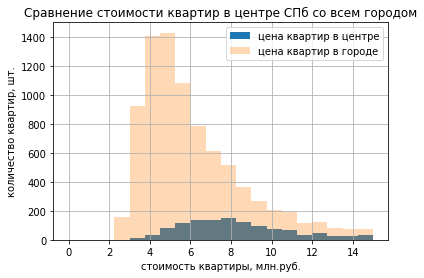

In [45]:
real_estate_spb_centre['last_price'].hist(bins=20, range=(0, 15), label='цена квартир в центре')
real_estate_spb['last_price'].hist(bins=20, range=(0, 15), alpha=0.3, label='цена квартир в городе')
plt.title('Сравнение стоимости квартир в центре СПб со всем городом')
plt.xlabel('стоимость квартиры, млн.руб.')
plt.ylabel('количество квартир, шт.')
plt.legend()
plt.show()

>В центре преобладает стоимость квартир 6-9 млн. На втором месте стоимость в 5.2 - 6 млн.   
>По СПб мы наблюдаем пик стоимости на 2х отрезках с очень незначительным разрывом (3.8 млн до 5.2 млн)  
>В центре квартиры в принципе дороже.

##### Число комнат в центре. Сравнение с городом

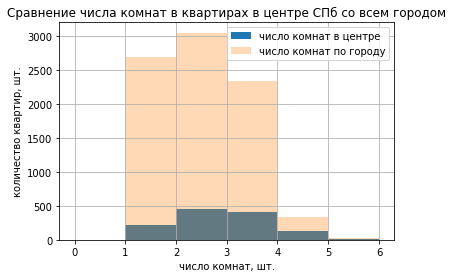

In [46]:
real_estate_spb_centre['rooms'].hist(bins=6, range=(0, 6), label='число комнат в центре')
real_estate_spb['rooms'].hist(bins=6, range=(0, 6), alpha=0.3, label='число комнат по городу')
plt.title('Сравнение числа комнат в квартирах в центре СПб со всем городом')
plt.xlabel('число комнат, шт.')
plt.ylabel('количество квартир, шт.')
plt.legend()
plt.show()

>В центре лидируют 2х и 3х комнатные квартиры  
>В городе - преобладают двухкомнатные квартиры и с небольшим отрывом - однокомнатные   
>Значит ли это, что в центральных квартирах изначально больше комнат, а однокомнатных квартир меньше?

##### Зависимость стоимости квартиры в центре от числа комнат. Сравнение с городом

In [47]:
#центр
real_estate_spb_centre.pivot_table(index='rooms', values='last_price').reset_index()

                                                                                                             

,rooms,last_price
0,1,6.366962
1,2,8.204700
2,3,8.791989
3,4,9.211587
4,5,9.942667


In [48]:
#город
real_estate_spb.pivot_table(index='rooms', values='last_price').sort_values(by='last_price').reset_index()

,rooms,last_price
0,1,4.547068
1,2,6.336142
2,3,7.432427
3,4,7.664320
4,5,8.571613


>1-3х комнатные квартиры в центре увеличиваются в цене с увеличением количества комнат. Однако 4х комнатные квартиры дороже 5ти комнатных. Хотя в  городе, наоборот, стоимость квартиры растет с увеличением комнат.

##### Зависимость стоимости квартиры от этажа

In [49]:
#центр
real_estate_spb_centre.pivot_table(index='floor_type', values='last_price').sort_values(by='last_price').reset_index()
                                                                                                             

,floor_type,last_price
0,первый,6.894440
1,последний,8.430434
2,другой,8.446428


In [50]:
#город
real_estate_spb.pivot_table(index='floor_type', values='last_price').sort_values(by='last_price').reset_index()

,floor_type,last_price
0,первый,5.357344
1,последний,6.128385
2,другой,6.250799


>И в центре, и в городе самые недорогие квартиры на первом этаже, а самые дорогие на последнем. 

##### Зависимость стоимости квартиры от удаленности от центра

In [51]:
#центр
real_estate_spb_centre.pivot_table(index='cityCenters_nearest_km', values='last_price').sort_values(by='last_price').reset_index()


,cityCenters_nearest_km,last_price
0,5,7.856074
1,3,7.914676
2,2,8.136650
3,4,8.463447
4,0,8.972808
5,1,9.023327


>Самые дорогие квартиры в центре и в 1 км от центра. Далее идут районы с удаленностью 4 - 5 км от центра. А вот самый недорогой в 3х км. Скорее всего это "старые, неблагополучные", т.е. не очень популярные для жизни центральные районы города, без красивых видов, в убитых зданиях и так далее

In [52]:
#город
real_estate_spb.pivot_table(index='cityCenters_nearest_km', values='last_price').sort_values(by='last_price').reset_index()


,cityCenters_nearest_km,last_price
0,23,3.907714
1,26,3.975000
2,25,4.111129
3,24,4.225667
4,28,4.405000
5,29,4.525000
6,19,4.752850
7,17,4.894364
8,18,5.208640
9,16,5.271581


>По городу показатели также скачут. Но в целом показывают тенденцию убывания в зависимости от удаленности. Остальные районы идут в принципе довольно логично, разница может быть в пару километров (например, 3 километр дешевле, чем 7) вполне возможно, что на 7 километре более интересный район (курортный, городского типа, коттеджи)

##### Зависимость стоимости квартиры от даты размещения объявления

In [53]:
#центр
real_estate_spb_centre.pivot_table(index='year', values='last_price').sort_values(by='year').reset_index()


,year,last_price
0,2014,8.830000
1,2015,7.844912
2,2016,7.835104
3,2017,8.055069
4,2018,8.432312
5,2019,8.903210


>Стоимость зависит от определенного года. В 2014 самая высокая стоимость на жилье в центре. В 2015 она резко падает и продолжает падать до 2018 года. В 2019 стоимость растет, но не превышает показатель 2014 года. Возможно, это связано с активной застройкой спальных районов города и в приницпе трендом жизни загородом

In [54]:
#город
real_estate_spb.pivot_table(index='year', values='last_price').sort_values(by='year').reset_index()


,year,last_price
0,2014,8.148708
1,2015,6.036053
2,2016,5.717127
3,2017,5.948132
4,2018,6.369288
5,2019,6.530732


>Данные по городу отличаются от данных по центру. Самая высокая цена по СПб в 2014 году, стоимость падает вплоть до 2017 года, в 2018 незначительно подрастает, а в 2019 сильно растет  
>
>Если сравнивать показатели, то появляется 2015-2017 год, когда стоимость недвижимости падает везде. В 2018 году в центре нелживижимость все еще падает, а в 2018 по городу стоимость незначительно подрастает. В 2019 году стоимость жилья везде опять растет

##  Результаты исследования

**1. Санкт-Петербург и Ленинградская область**

* 52% квартир продаются за 3-6 млн. руб.  
* 92% всего рынка составляют 1-2 комнатные квартиры. Двухкомнатных квартир в продаже больше почти на 70%, чем однокомнатных 
* Самые часто встречающиеся плоащди от 30 до 60 квадратных метров (около 60%)
* Наиболее часто встречающаяся высота потолков: 2,3-3,7 метров   
* Время продажи квартир:   
Среднее время продажи квартиры - 6 месяцев - 1 год  
Быстрая продажа -  менее 3,5 месяцев  
Аномально долгая продажа - 3,5 лет и более.    
Очень долгая продажа - от 2,5 до 3,5 лет.    
Долгая продажа - от 1 года до 2,5 лет.  

*Параметры, влияющие на стоимость квартир в СПб и Ленобласти:*  

* **Площадь.** Чем больше площадь квартиры, тем выше ее стоимость. (Коэффициент корреляции между ценой и площадью недвижимости составляет 0.67)
* **Количество комнат.** Связь между стоимостью квартиры и количеством комнат есть, однако, не сильная. Стоит предположить, что есть ситуации, когда цена растет при увеличении количества комнат и наоборот, но так бывает далеко не всегда. Легко могут быть ситуации, когда большая площадь не говорит о наличии большего количества комнат.
* **Удаленность от центра.** С увеличением удаленности квартиры от центра только иногда ее стоимость уменьшается. Также есть элитные нецентральные районы в пригородах, малоэтажные постройки и так далее. Связь слабая (-0,23), не всегда удаленность от центра предполагает низкую стоимость жилья.  
* **Удаленность квартир от центра в Санкт-Петербурге.** На отрезке 0-5 км от центра стоимость квартир выше и колеблется от 12 до 18 млн. рублей. С удаленностью 5-10 км, стоимость квартиры составляет от 6 до 12 млн.
* **Этаж.** Квартиры на первом этаже дешевле, чем квартиры на других этажах. Квартиры на последнем этаже дороже всего.
* **Дата размещения объявления.**
День размещения не влияет на стоимость квартиры
Месяц размещения. В мае и августе самая низкая стоимость на квартиры. Самые дорогие квартиры размещены в декабре и январе. Исходя из среднего врмени продажи квартир можно говорить о сезонности. 
Год размещения. Стоимость квартиры зависит от года продажи и связано с экономической ситуацией в определенное время  
* **Населенный пункт.** Стоимость квартиры зависит от населенного пункта. Самая высокая стоимость жилья в Санкт-Петербурге. Дальше идут Пушкин и поселок Парголово. Самые недорогие квартиры расположены во Всеволожске, Гатчине и Выборге  

**2. Санкт-Петербург и центр Санкт-Петербурга**

* **Высота потолков.** В центре преобладает высота потолков от 3 до 4 метров, когда как, например, по всему СПб преобладающее значение 2-3 метра  
* **Площадь.** В центре преобладает площадь в 60-73 квадратных метров, на втором месте с небольшим отрывом от 73 до 83. По городу показатель в 37-48 квадратных метров сильно выбивается в лидеры.  
* **Стоимость.** В центре преобладает стоимость квартир 6-9 млн. На втором месте стоимость в 5.2 - 6 млн.
По СПб стоимость колеблется от 3.8 млн до 5.2 млн. В центре Санкт-Петербурга квартиры дороже.  
* **Число комнат.** В центре лидируют 2х и 3х комнатные квартиры. В городе преобладают двухкомнатные квартиры и с небольшим отрывом - однокомнатные.  

*Параметры, влияющие на стоимость квартир в Санкт-Петербурге и центре Санкт-Петербурга*  

* **Количество комнат.** 1-3х комнатные квартиры в центре увеличиваются в цене с увеличением количества комнат. Однако 4х комнатные квартиры дороже 5ти комнатных. В городе, наоборот, стоимость квартиры растет с увеличением комнат.  
* **Этаж.** И в центре, и в городе самые недорогие квартиры на первом этаже, а самые дорогие на последнем.  
* **Удаленность от центра.** Самые дорогие квартиры в центре (радиус до 5 км) и в 1 км от центра. Далее идут районы с удаленностью 4 - 5 км от центра. А вот самый недорогой в 3х км. Скорее всего это "старые, неблагополучные", т.е. не очень популярные для жизни центральные районы города, без красивых видов, в убитых зданиях и так далее. По городу показатели показывают тенденцию убывания в зависимости от удаленности. Остальные районы идут в принципе довольно логично, разница может быть в пару километров (например, 3 километр дешевле, чем 7) вполне возможно, что на 7 километре более интересный район (курортный, городского типа, коттеджи)  
* **Дата размещения объявления.** Стоимость зависит от определенного года


